# Non parametric regression Practice

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [31]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [32]:
df_data = pd.DataFrame(data=data.data, columns=data.feature_names)
df_target = pd.DataFrame(data=data.target, columns=['target'])

In [33]:
df_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [34]:
df_target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [35]:
data_x = df_data['bmi']
data_y = df_target

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

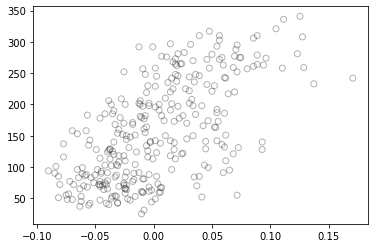

In [37]:
# Visualize the relationship between bmi and target
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

### Piecewise step function

In [38]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(-0.0905, -0.0251]     96
(-0.0251, 0.0401]     133
(0.0401, 0.105]        59
(0.105, 0.171]          8
Name: bmi, dtype: int64

In [39]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['bmi','bmi_cuts','target'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(-0.0905, -0.0251]","(-0.0251, 0.0401]","(0.0401, 0.105]","(0.105, 0.171]"
69,1,0,0,0
179,0,1,0,0
91,0,0,1,0
363,0,1,0,0
161,0,0,1,0


In [46]:
print(bin_mapping_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4]


In [47]:
# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.bmi, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(test_x, bins) 
X_valid = pd.get_dummies(bin_mapping)

# Prediction
pred2 = fit3.predict(X_valid)

In [41]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 

rms = sqrt(mean_squared_error(test_y, pred2)) 
print(rms) 

162.27300457270846


In [45]:
xp = np.linspace(test_x.min(),test_x.max())


bin_mapping_2 = np.digitize(xp, bins) 

X_valid_2 = pd.get_dummies(bin_mapping) 

pred2 = fit3.predict(X_valid_2)

In [48]:
print(X_valid_2)

    1  2  3  4
0   1  0  0  0
1   1  0  0  0
2   1  0  0  0
3   1  0  0  0
4   1  0  0  0
5   1  0  0  0
6   1  0  0  0
7   1  0  0  0
8   1  0  0  0
9   1  0  0  0
10  1  0  0  0
11  1  0  0  0
12  1  0  0  0
13  0  1  0  0
14  0  1  0  0
15  0  1  0  0
16  0  1  0  0
17  0  1  0  0
18  0  1  0  0
19  0  1  0  0
20  0  1  0  0
21  0  1  0  0
22  0  1  0  0
23  0  1  0  0
24  0  1  0  0
25  0  1  0  0
26  0  0  1  0
27  0  0  1  0
28  0  0  1  0
29  0  0  1  0
30  0  0  1  0
31  0  0  1  0
32  0  0  1  0
33  0  0  1  0
34  0  0  1  0
35  0  0  1  0
36  0  0  1  0
37  0  0  1  0
38  0  0  1  0
39  0  0  0  1
40  0  0  0  1
41  0  0  0  1
42  0  0  0  1
43  0  0  0  1
44  0  0  0  1
45  0  0  0  1
46  0  0  0  1
47  0  0  0  1
48  0  0  0  1
49  0  0  0  1


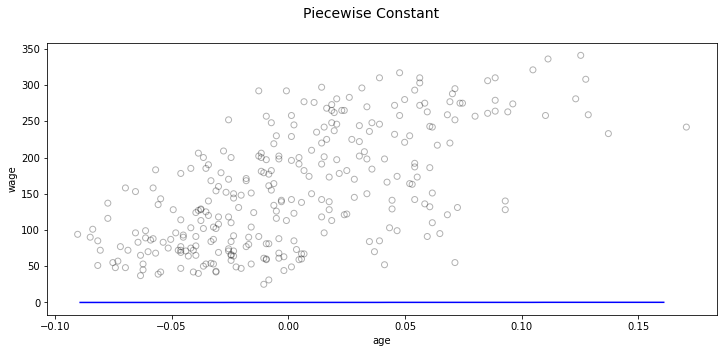

In [43]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()